# Google Playstore Case Study

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the **most promising apps**. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [1]:
#import the libraries
import pandas as pd
import numpy as np

In [2]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

In [4]:
inp0.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [5]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [6]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable which would influence our analysis
 - imputing values may skew our results significantly 
 - drop the records

In [7]:
#Drop the rows having null values in the Rating field
inp1 = inp0.dropna(axis=0)

#Check the shape of the dataframe
inp1.shape

(9360, 13)

In [8]:
inp1 = inp0[~inp0.Rating.isnull()]
inp1.shape

(9367, 13)

In [9]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [10]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values

inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [11]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
inp1.loc[10472, :]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [13]:
inp1[(inp1['Android Ver'].isnull() ) & (inp1.Rating == 19.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
#Drop the row having shifted values
inp1 = inp1[~((inp1['Android Ver'].isnull() ) & (inp1.Rating == 19.0))]

In [15]:
#Check the nulls again in Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [16]:
#Check the most common value in the Android version column
inp1['Android Ver'].mode()[0]

'4.1 and up'

In [17]:
inp1['Android Ver'].value_counts().head()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
Name: Android Ver, dtype: int64

In [18]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna('4.1 and up')

In [19]:
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [20]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [21]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [22]:
#Check the most common value in the Current version column
inp1['Current Ver'].mode()[0]

'Varies with device'

In [23]:
inp1['Current Ver'].value_counts().head()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
Name: Current Ver, dtype: int64

In [24]:
#Replace the nulls in the Current version column with the above value

inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [25]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].mode()[0]

'Varies with device'

In [26]:
inp1['Current Ver'].value_counts().head()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
Name: Current Ver, dtype: int64

Imputations are generally done when keeping the missing values disbars you from doing further analysis and eliminating the rows containing those values leads to some bias. 

The estimation is based on the mean, mode, median, etc. of the data.

In cases where there are numerical columns involved, both mean and median offer up as a good imputed value. In the case of the categorical column, mode turns out to be a decent enough imputation to carry out.

#### Handling Incorrect Data Types 

In [27]:
#Check the datatypes of all the columns 
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


Aggregations like average, sum or mean cannot be performed on character variables or strings. Only numeric datatypes like float or int would allow you to calculate those values. 

In [28]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 

# inp1[inp1["Android Ver"] == '4.1 and up']["Price"].mean()

In [29]:
#Analyse the Price column to check the issue
inp1["Price"].value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [30]:
# Additonal ‘$’ sign for every paid app
#Write the function to make the changes

inp1["Price"] = inp1["Price"].apply(lambda x: 0 if x=="0"  else float(x[1:]))

In [31]:
#Verify the dtype of Price once again
inp1["Price"].value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [32]:
#Analyse the Reviews column
inp1["Reviews"].value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [33]:
#Change the dtype of this column
inp1["Reviews"] = inp1["Reviews"].apply(lambda x: int(x))

inp1["Reviews"] = inp1["Reviews"].astype('int32')

In [34]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


In [35]:
#Check the quantitative spread of this dataframe

inp1["Reviews"].describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [36]:
#Analyse the Installs Column

inp1["Installs"].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [37]:
inp1["Installs"].apply(lambda x: x.replace('+', "")).apply(lambda x: x.replace(',', "")).value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [38]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.

inp1["Installs"] = inp1["Installs"].apply(lambda x: x.replace('+', "")).apply(lambda x: x.replace(',', "")).astype('int32')

In [39]:
inp1["Installs"].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [40]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


In [41]:
inp1["Installs"].describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [42]:
inp1["Installs"].mean()

17897443.726030324

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [43]:
# Perform the sanity checks on the Reviews column
# Rating is between 1 and 5 for all the apps.

inp1["Rating"].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [44]:
# max is 5 and min is 1

In [45]:
#Perform the sanity checks on the Reviews column
inp1["Reviews"].describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [46]:
# Number of Reviews is less than or equal to the number of Installs.

inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [47]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [48]:
inp1.shape

(9366, 13)

In [49]:
# drop them

inp1 = inp1[(inp1.Reviews <= inp1.Installs)]
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [50]:
inp1.shape

(9359, 13)

In [51]:
#perform the sanity checks on prices of free apps 

inp1[(inp1.Type=="Free") & inp1.Price >0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [52]:
inp1[(inp1.Type=="Free") & inp1.Price >0].describe()

,Rating,Reviews,Size,Installs,Price
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

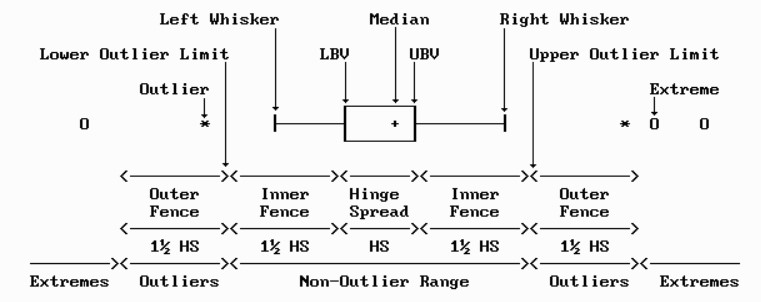

https://www.xycoon.com/nonoutlier_range.htm

**Hinge**

- Q1 : LOWER HINGE OR LEFT HINGE
- Q3 : UPPER HINGE OR RIGHT HINGE
- Q3-Q1 : IQR OR IQD OR HINGE SPREAD OR MIDSPREAD

**Inner fences OR Whiskers OR Extremes**

- Q1- 1.5(IQR): LOWER INNER FENCE OR LEFT INNER FENCE OR LOWER WHISKER OR LEFT WHISKER
- Q3+ 1.5(IQR): UPPER INNER FENCE OR RIGHT INNER FENCE OR UPPER WHISKER OR RIGHT WHISKER

**Outer fences**

- Q1- 3(IQR): LOWER OUTER FENCE OR LEFT OUTER FENCE 
- Q3+ 3(IQR): UPPER OUTER FENCE OR RIGHT OUTER FENCE

**Outliers**
- Data points within outer fences

**Extremes**
- Data points below left outer fence or above the right outer fences

In [53]:
# all the apps are "I'm rich", these are suspicious -> junk apps
# Clean the Price column
inp1 = inp1[inp1.Price <200]

In [54]:
#Clean the Price column again
inp1 = inp1[inp1.Price<30]
inp1.shape

(9338, 13)

In [55]:
#Check records with 10 million reviews
# uber successful apps
# apps won’t be useful for our analysis since they already have skewed statistics
inp1[inp1.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [56]:
#Drop the above records

inp1 = inp1[inp1.Reviews <= 10000000]
inp1.shape

(9246, 13)

In [57]:
#CLean the Installs by removing all the apps having more than or equal to 100 million installs

inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(9177, 13)

### Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


https://seaborn.pydata.org/api.html

In [58]:
#import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

Instead of frequency on the left axis, it has the density for each bin or bucket.

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

#### Histogram versus distribution plots

The difference arises due to the fact that instead of calculating the ‘frequency’, the distplot in Seaborn directly computes the probability density for that rating bucket. And the curve (or the KDE as noted in the documentation for Seaborn) that gets drawn over the distribution is the approximate probability density curve.

The advantage of the distplot view is that it adds a layer of probability distribution without any additional inputs and preserves the same inter-bin relationship as in the Matplotlib version. 

Another chart analogous to the histogram is the countplot. It essentially plots the frequency of values for a categorical variable. Basically, the values are the same as when you take a value_counts() for that variable.

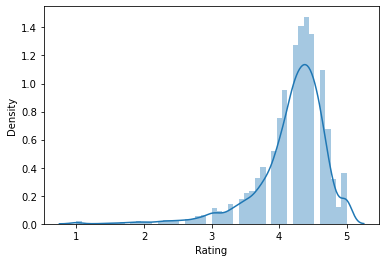

In [59]:
#Create a distribution plot for rating
sns.distplot(inp1.Rating)
plt.show()

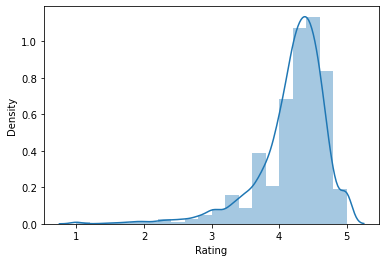

In [60]:
#Change the number of bins

sns.distplot(inp1.Rating, bins=20)
plt.show()

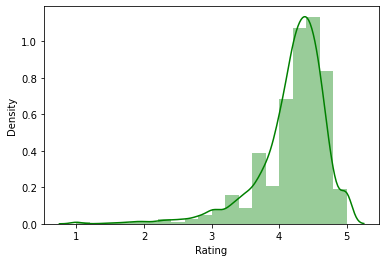

In [61]:
#Change the colour of bins to green
# sns.distplot(inp1.Rating, bins=20, color='g')
sns.distplot(inp1.Rating, bins=20, color='green')
plt.show()

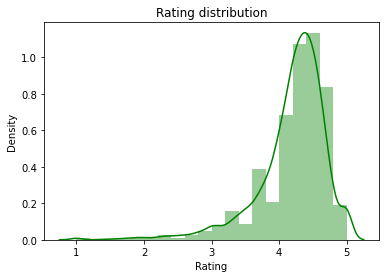

In [62]:
#Apply matplotlib functionalities
plt.title("Rating distribution", fontsize=12)
sns.distplot(inp1.Rating, bins=20, color='green')
plt.show()

<AxesSubplot:xlabel='Rating'>

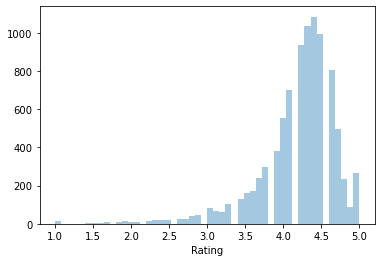

In [63]:
sns.distplot(inp1.Rating,kde = False)

<AxesSubplot:xlabel='Density', ylabel='Rating'>

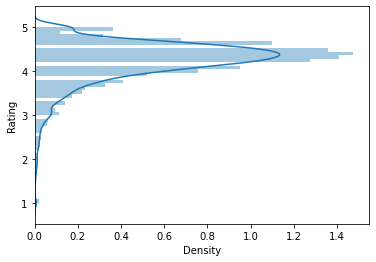

In [64]:
sns.distplot(inp1.Rating,vertical = True)

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [156]:
#Check all the styling options
?sns.set_style

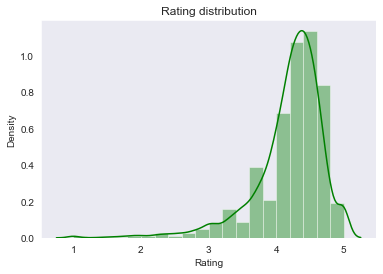

In [66]:
sns.set_style(style="dark")

plt.title("Rating distribution", fontsize=12)
sns.distplot(inp1.Rating, bins=20, color='green')
plt.show()

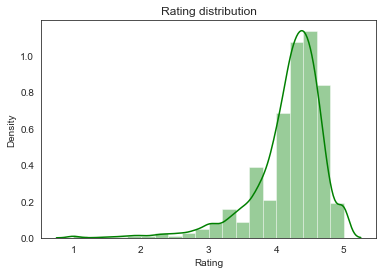

In [67]:
sns.set_style(style="white")

plt.title("Rating distribution", fontsize=12)
sns.distplot(inp1.Rating, bins=20, color='green')
plt.show()

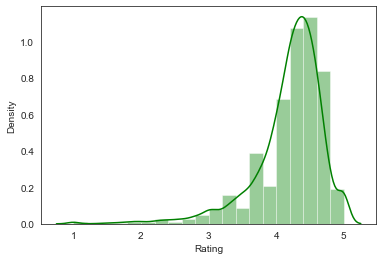

In [68]:
#Change the number of bins to 20
sns.distplot(inp1.Rating, bins=20, color='green')
plt.show()

### Matplotlib themes/styles

In [71]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [79]:
plt.style.use("tableau-colorblind10")

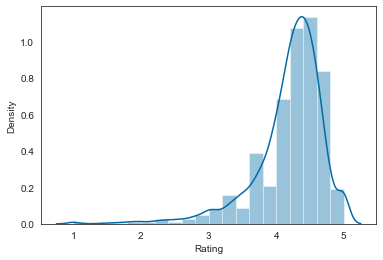

In [80]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

In [81]:
plt.style.use("ggplot")

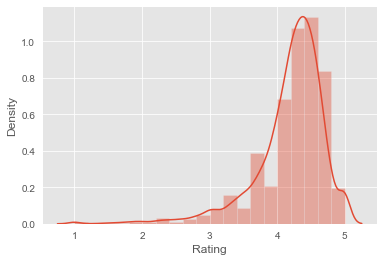

In [82]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

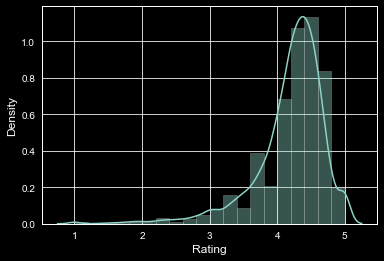

In [84]:
plt.style.use("dark_background")
sns.distplot(inp1.Rating, bins=20)
plt.show()

In [86]:
# reset the themes

plt.style.use("default")
%matplotlib inline

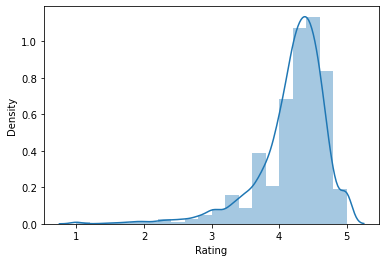

In [87]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [89]:
#Analyse the Content Rating column
inp1["Content Rating"].value_counts()

Everyone           7286
Teen               1055
Mature 17+          458
Everyone 10+        374
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [94]:
#Remove the rows with values which are less represented 
inp1[inp1["Content Rating"].isin(["Unrated","Adults only 18+"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [96]:
inp1 = inp1[~inp1["Content Rating"].isin(["Unrated","Adults only 18+"])]

In [98]:
inp1.shape

(9173, 13)

In [99]:
#Reset the index
inp1.reset_index(inplace=True, drop=True)

In [100]:
#Check the apps belonging to different categories of Content Rating 
inp1["Content Rating"].value_counts()

Everyone        7286
Teen            1055
Mature 17+       458
Everyone 10+     374
Name: Content Rating, dtype: int64

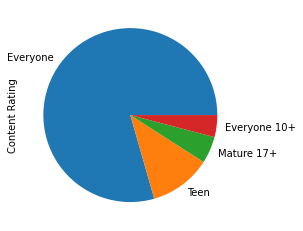

In [103]:
#Plot a pie chart

inp1["Content Rating"].value_counts().plot.pie()
plt.show()

A pie chart is not very much preferred in cases where there are 3 more categories to be plotted. It is very difficult to assess the difference between the different categories when their proportions

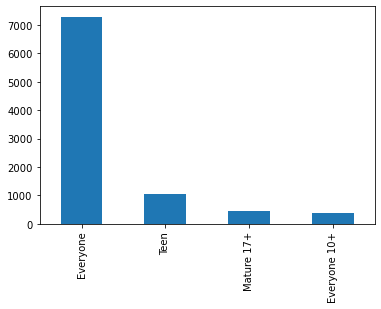

In [107]:
#Plot a bar chart
inp1["Content Rating"].value_counts().plot.bar()
plt.show()

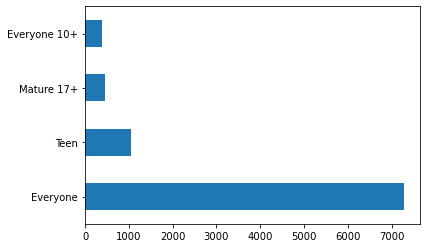

In [109]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp1["Content Rating"].value_counts().plot.barh()
plt.show()

<AxesSubplot:>

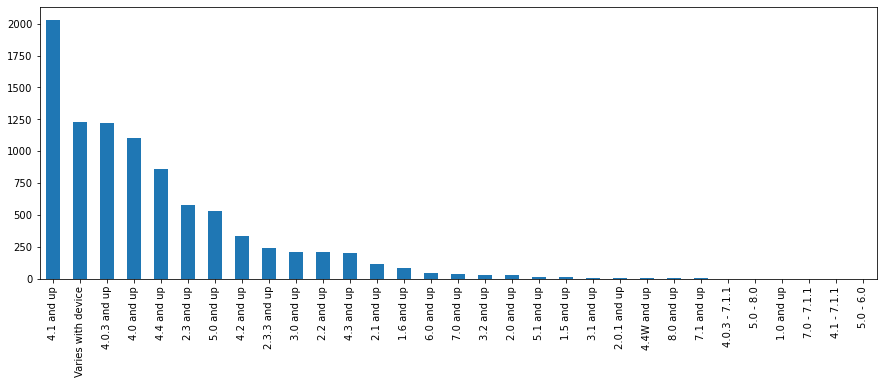

In [114]:
plt.figure(figsize=(15,5))
inp1['Android Ver'].value_counts().plot.bar()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. (Observing trends between numeric variables)
- Also, they help in observing __naturally occuring clusters__. 
- plot the relationship between two numeric variables, use scatter plot

Use **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

A JointPlot which combines the functionality of a scatter plot and also adds additional statistical information to it. 

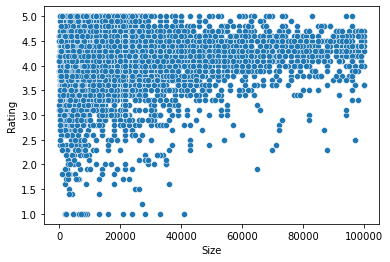

In [122]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
sns.scatterplot(inp1.Size, inp1.Rating)
plt.show()

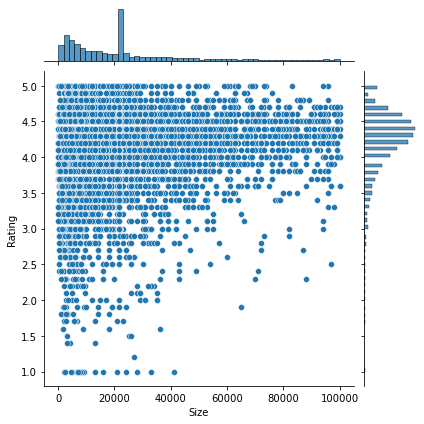

In [123]:
### Plot the same thing now using a jointplot
sns.jointplot(inp1.Size, inp1.Rating)
plt.show()

- no strong pattern observed, weak general trend
- heavier the app, higher is the rating
- heavier apps may have better features or performance, hence better ratings

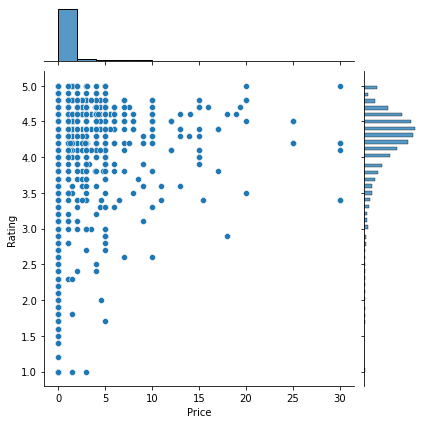

In [124]:
## Plot a jointplot for Price and Rating
sns.jointplot(inp1.Price, inp1.Rating)
plt.show()

- Higher the price, no apps have less than rating of 3
- Free apps have a range of ratings 

<Figure size 720x720 with 0 Axes>

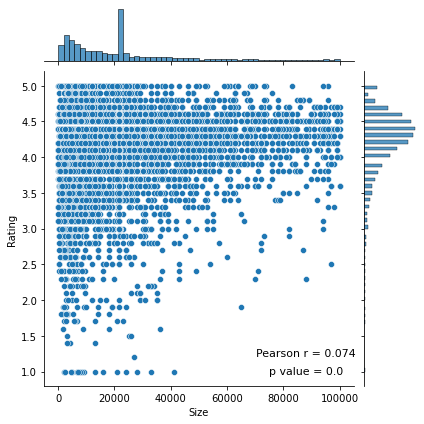

In [125]:
import scipy.stats as ss
#str1 will hold the value of Pearson r
str1 = 'Pearson r = {}'.format(ss.pearsonr(inp1.Size,inp1.Rating)[0].round(3))

#str2 will hold the p value
str2 = 'p value = {}'.format(ss.pearsonr(inp1.Size,inp1.Rating)[1].round(9))   
plt.figure(figsize = (10,10))
sns.jointplot(inp1.Size, inp1.Rating)

#Manually align the position of str1 and str2
plt.text(-1250,1.25, str1,horizontalalignment='center',verticalalignment='center',fontsize = 11 )
plt.text(-1250,1.0,str2,horizontalalignment='center',verticalalignment='center',fontsize = 11)
plt.show()

In [126]:
ss.pearsonr(inp1.Size,inp1.Rating)

(0.07408571914629593, 1.2083345450280716e-12)

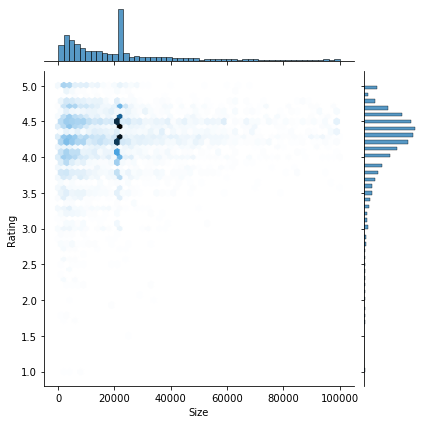

In [133]:
sns.jointplot(inp1.Size, inp1.Rating, kind='hex')

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 
- Seaborn provides automatic estimation and plotting for regression setups for different kind of variables. 

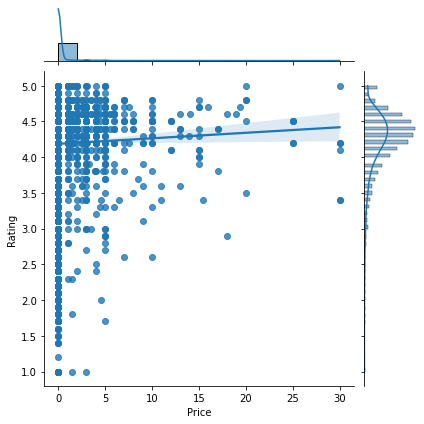

In [130]:
##Plot a reg plot for Price and Rating and observe the trend

sns.jointplot(inp1.Price, inp1.Rating, kind="reg")

In [143]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [146]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
Paid_apps = inp1[~(inp1.Price<=0) ]

In [149]:
Paid_apps.sort_values(by="Price")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6109,HD Widgets,PERSONALIZATION,4.3,58614,26000.0,1000000,Paid,0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up
4078,Lock 'n' Roll Pro - Ad Free,GAME,4.6,169,13000.0,1000,Paid,0.99,Everyone,Card,"July 1, 2015",4.0.5,2.3.3 and up
6491,211:CK,GAME,5.0,8,38000.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up
4360,W-History Standalone,SOCIAL,3.2,38,1500.0,1000,Paid,0.99,Everyone,Social,"March 9, 2018",1.935,7.0 and up
6490,F*ck This Game,GAME,4.6,8,6300.0,100,Paid,0.99,Teen,Action,"July 18, 2015",1.0.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25000.0,50000,Paid,29.99,Everyone,Sports,"July 11, 2018",4.18.0,4.1 and up
4999,AP Art History Flashcards,FAMILY,5.0,1,96000.0,10,Paid,29.99,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up
2229,EMT PASS,MEDICAL,3.4,51,2400.0,1000,Paid,29.99,Everyone,Medical,"October 22, 2014",2.0.2,4.0 and up
2246,PTA Content Master,MEDICAL,4.2,64,41000.0,1000,Paid,29.99,Everyone,Medical,"December 22, 2015",2.1,2.2 and up


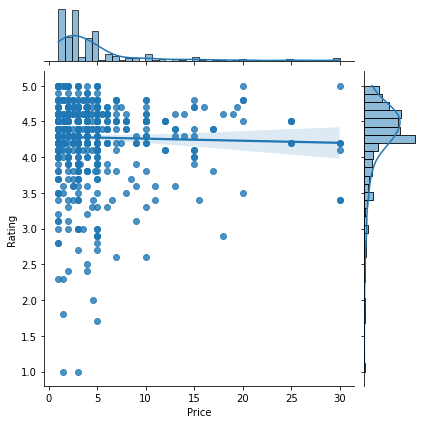

In [147]:
sns.jointplot(Paid_apps.Price, Paid_apps.Rating, kind="reg")

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. 

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [117]:
?sns.pairplot

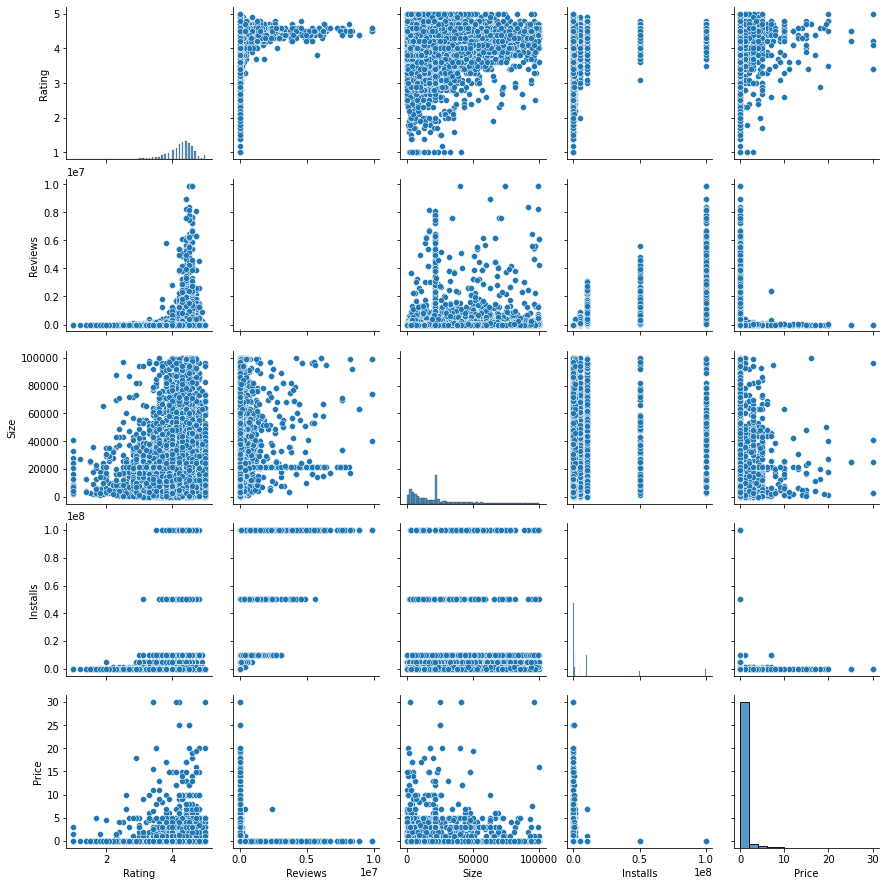

In [116]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp1)
plt.show()

- for every two numeric variables, the pairplot creates a scatter-plot. This is pretty useful in identifying relationships between two numeric variables
- the diagonal ones, where the same variable is being considered twice, a histogram is shown

- Reviews and Price have an inverse relationship -> L-shaped scatter plot

In [151]:
inp1["App Type"] = inp1.Price.apply(lambda x: "Free" if x<=0 else "Paid")

In [152]:
inp1["App Type"].value_counts()

Free    8550
Paid     623
Name: App Type, dtype: int64

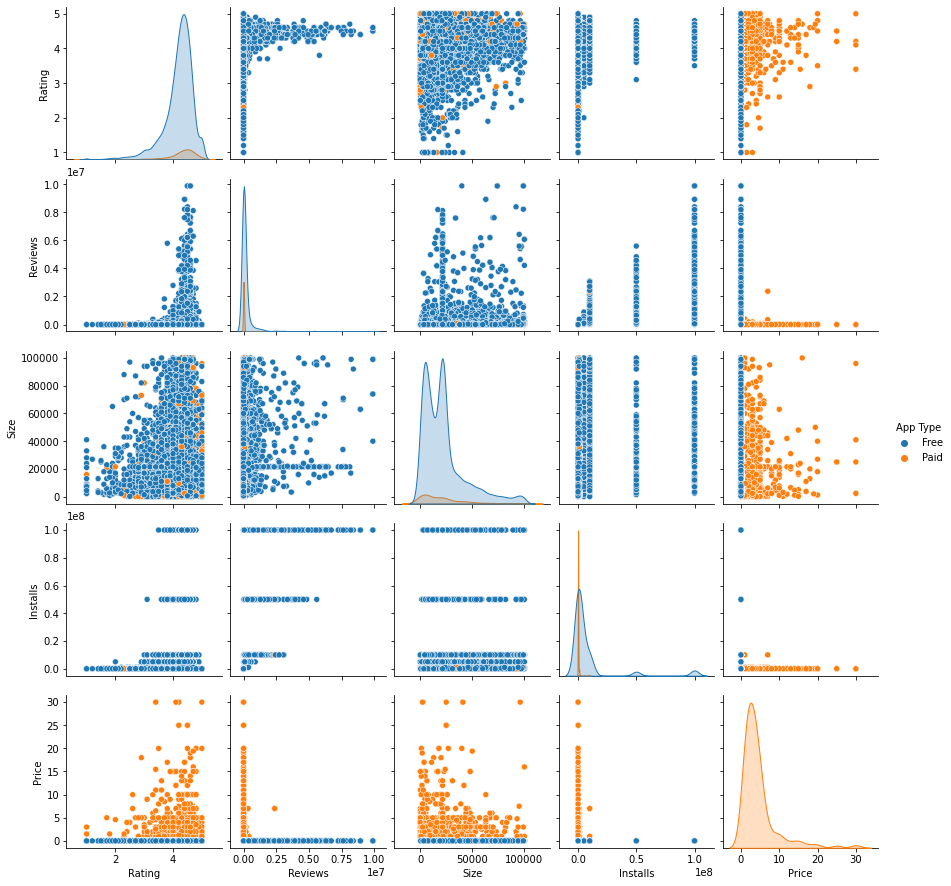

In [153]:
sns.pairplot(inp1, hue='App Type')

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

<AxesSubplot:xlabel='Content Rating'>

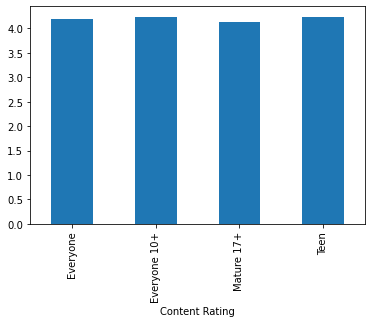

In [160]:
##Plot a bar plot of Content Rating vs Average Rating 
inp1.groupby(["Content Rating"])["Rating"].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating'>

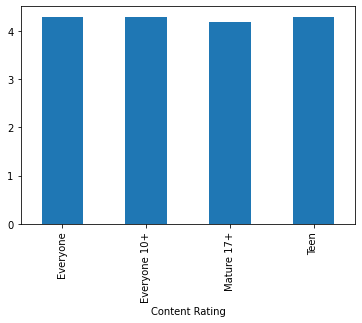

In [161]:
##Plot the bar plot again with Median Rating
inp1.groupby(["Content Rating"])["Rating"].median().plot.bar()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

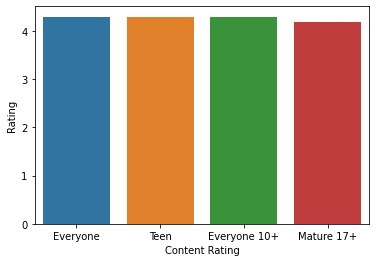

In [162]:
##Plot the above bar plot using the estimator parameter

sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.median)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

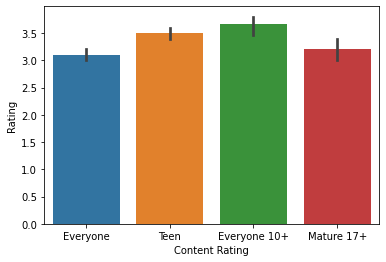

In [163]:
##Plot the bar plot with only the 5th percentile of Ratings
estimator=lambda x: np.quantile(x,0.05)

sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=lambda x: np.quantile(x,0.05))

- “Everyone 10+” has the highest rating at the 5th percentile (3.5), followed by “Teen” (around 3.3) and then “Everyone” & “Mature 17+”(around 3).

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

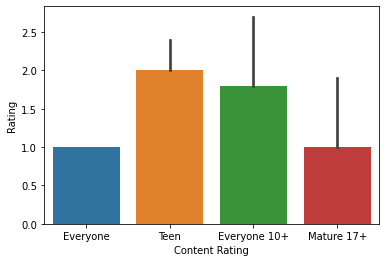

In [165]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator = np.min)


__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

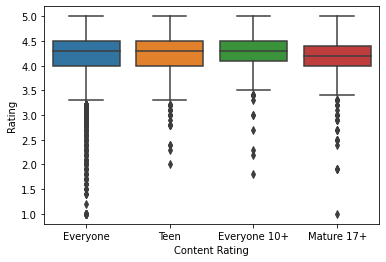

In [166]:
##Plot a box plot of Rating vs Content Rating
sns.boxplot(data=inp1, x="Content Rating", y="Rating")

- Everyone” category has the highest number of ratings in the lower percentiles as compared to the other categories.
- The median values are all comparable
- The upper fences for all the categories get capped at 5.0, whereas there are some observable differences in the lower fences.

<AxesSubplot:xlabel='Rating'>

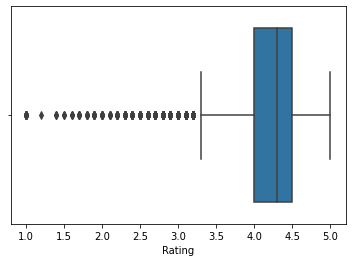

In [167]:
##Question - Plot a box plot for the Rating column only
sns.boxplot(data=inp1,x="Rating")

In [169]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
inp1['Genres'].value_counts().head()

Tools            717
Entertainment    527
Education        468
Action           350
Medical          344
Name: Genres, dtype: int64

In [170]:
c = ['Tools','Entertainment','Medical','Education']
inp5= inp1[inp1['Genres'].isin(c)]

<AxesSubplot:xlabel='Genres', ylabel='Rating'>

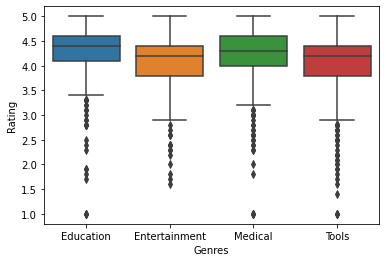

In [171]:
sns.boxplot(inp5['Genres'],inp1.Rating)

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [177]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut

inp1["Size bucket"]= pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H", "VH"])
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Type,Size bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Free,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Free,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Free,VL


In [179]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=inp1, index="Content Rating", columns="Size bucket", values="Rating")

Size bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.112642,4.166794,4.246220,4.163227,4.218347
Everyone 10+,4.189474,4.223333,4.247788,4.226761,4.251773
Mature 17+,4.112281,4.085227,4.075510,4.174603,4.194175
Teen,4.200952,4.233548,4.205740,4.228462,4.274850


In [180]:
##Change the aggregation to median
pd.pivot_table(data=inp1, index="Content Rating", columns="Size bucket", values="Rating", aggfunc=np.median)

Size bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.30,4.3,4.30,4.3
Everyone 10+,4.1,4.35,4.3,4.30,4.3
Mature 17+,4.3,4.20,4.2,4.20,4.2
Teen,4.3,4.30,4.3,4.25,4.3


In [181]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp1, index="Content Rating", columns="Size bucket", values="Rating", aggfunc=lambda x: np.quantile(x,0.2))

Size bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.98
Everyone 10+,3.86,3.98,4.1,4.0,4.00
Mature 17+,3.42,3.70,3.9,3.9,4.00
Teen,3.80,3.90,3.9,4.0,4.00


In [182]:
##Store the pivot table in a separate variable
inp2 = pd.pivot_table(data=inp1, index="Content Rating", columns="Size bucket", values="Rating", aggfunc=lambda x: np.quantile(x,0.2))

binning - convert a numeric variable to a categorical variable by bucketing a specific range of values. 

pd.qcut method divided the entire Size column to  buckets on the basis of the percentiles. 

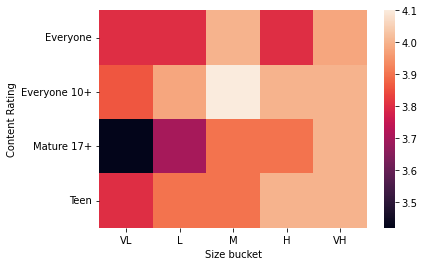

In [187]:
##Plot a heat map
sns.heatmap(inp2)
plt.show()

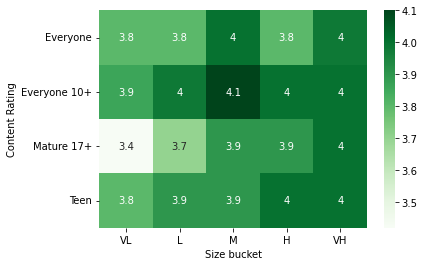

In [188]:
##Apply customisations
sns.heatmap(inp2, annot=True, cmap = "Greens")
plt.show()

In [189]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating


### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [192]:
## Extract the month from the Last Updated Date

inp1["Updated Month"] = pd.to_datetime(inp1['Last Updated']).dt.month

In [195]:
## Find the average Rating across all the months

inp1.groupby("Updated Month")["Rating"].mean()

Updated Month
1     4.143735
2     4.094048
3     4.110989
4     4.154910
5     4.161818
6     4.181502
7     4.246140
8     4.292867
9     4.042636
10    4.019687
11    4.112338
12    4.071726
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Updated Month'>

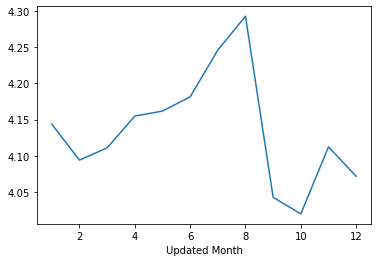

In [196]:
## Plot a line graph

inp1.groupby("Updated Month")["Rating"].mean().plot()

There is indeed some improvement in the ratings during the months of July-August. 

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category

In [197]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp1, index="Updated Month", columns="Content Rating" ,values="Installs")

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated Month,,,,
1,3.024742e+06,4.386750e+06,5.706594e+05,1.635519e+06
2,2.640704e+06,1.238812e+06,8.681000e+05,1.277345e+06
3,2.272534e+06,1.595922e+06,6.074067e+05,1.920198e+06
4,6.204237e+06,2.118182e+06,2.767895e+05,5.325871e+06
5,4.285187e+06,4.577625e+06,4.405604e+06,6.394200e+06
6,4.469491e+06,1.792087e+07,2.772450e+06,4.249719e+06
7,9.808134e+06,2.198835e+07,6.924536e+06,1.643834e+07
8,1.296491e+07,3.721052e+06,2.414688e+07,2.248928e+07
9,1.954002e+06,1.466535e+06,3.668350e+05,8.993240e+05


In [201]:
##Store the table in a separate variable
inp2 = pd.pivot_table(data=inp1, index="Updated Month", columns="Content Rating" ,values="Installs", aggfunc=sum)

<AxesSubplot:xlabel='Updated Month'>

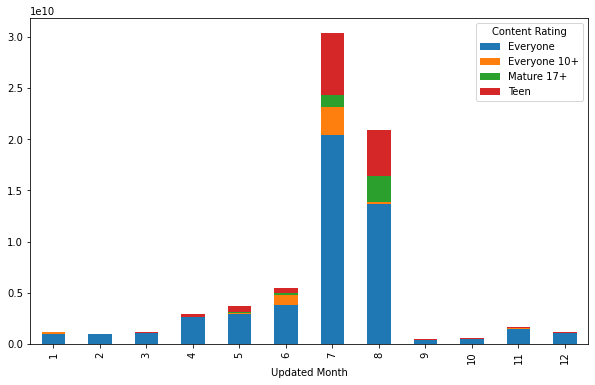

In [203]:
##Plot the stacked bar chart.
inp2.plot(kind="bar", stacked=True, figsize=(10,6))

the months June-Aug has the highest number of installs, it is quite difficult to infer anything about the different Content Rating categories. 

In [206]:
##Plot the stacked bar chart again wrt to the proportions.

inp2[["Everyone", "Everyone 10+" ,"Mature 17+", "Teen"]].apply(lambda x: x/x.sum(), axis=1)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated Month,,,,
1,0.865649,0.088881,0.008190,0.037280
2,0.928828,0.019474,0.012794,0.038905
3,0.882426,0.025596,0.007691,0.084287
4,0.896259,0.008052,0.001817,0.093871
5,0.785373,0.034344,0.029512,0.150771
6,0.703110,0.176404,0.028301,0.092185
7,0.672071,0.089865,0.040852,0.197212
8,0.656086,0.010342,0.118029,0.215543
9,0.892130,0.054203,0.004785,0.048881


<AxesSubplot:xlabel='Updated Month'>

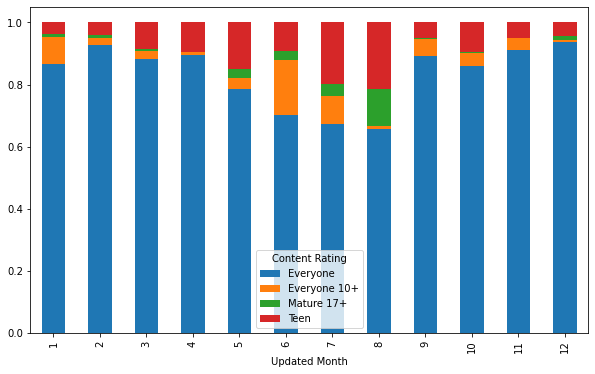

In [207]:
inp3 = inp2[["Everyone", "Everyone 10+" ,"Mature 17+", "Teen"]].apply(lambda x: x/x.sum(), axis=1)
inp3.plot(kind="bar", stacked=True, figsize=(10,6))

# Distribution plots

- distplot
- joinplot
- pairplot

# Categorical Plots

- boxplot
- violinplot
- countplot
- bar plot